In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Clean_dataset.csv')

In [3]:
df

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,xG,...,Clr,Err,Season,Team,Opponent,Attendance,Captain,Formation,Opp Formation,Referee
0,17-08-2024,12:30,Premier League,Matchweek 1,Sat,Away,W,2,0,2.6,...,17,1,2025,Liverpool,Ipswich Town,30014.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Tim Robinson
1,25-08-2024,16:30,Premier League,Matchweek 2,Sun,Home,W,2,0,2.5,...,12,0,2025,Liverpool,Brentford,60017.0,Virgil van Dijk,4-2-3-1,04-04-2002,Stuart Attwell
2,01-09-2024,16:00,Premier League,Matchweek 3,Sun,Away,W,3,0,1.8,...,28,0,2025,Liverpool,Manchester Utd,73738.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Anthony Taylor
3,14-09-2024,15:00,Premier League,Matchweek 4,Sat,Home,L,0,1,0.9,...,16,0,2025,Liverpool,Nott'ham Forest,60344.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Michael Oliver
4,21-09-2024,15:00,Premier League,Matchweek 5,Sat,Home,W,3,0,2.0,...,24,1,2025,Liverpool,Bournemouth,60347.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Tony Harrington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,02-05-2021,19:15,Premier League,Matchweek 34,Sun,Away,L,0,4,0.5,...,14,0,2021,Sheffield United,Tottenham,NaN,John Egan,3-4-1-2,4-2-3-1,Andre Marriner
3176,08-05-2021,15:00,Premier League,Matchweek 35,Sat,Home,L,0,2,0.7,...,19,2,2021,Sheffield United,Crystal Palace,NaN,John Egan,03-05-2002,04-03-2003,Simon Hooper
3177,16-05-2021,19:00,Premier League,Matchweek 36,Sun,Away,W,1,0,1.2,...,27,0,2021,Sheffield United,Everton,NaN,John Egan,03-04-2003,4-2-3-1,Jonathan Moss
3178,19-05-2021,18:00,Premier League,Matchweek 37,Wed,Away,L,0,1,0.9,...,16,0,2021,Sheffield United,Newcastle Utd,10000.0,John Egan,03-04-2003,05-03-2002,Robert Jones


In [4]:
total_matches = len(df)

In [5]:
total_matches

3180

In [6]:
df_2025 = df[df['Season'] == 2025]
len(df_2025)

140

In [7]:
df = df[df['Season'] != 2025]

In [8]:
len(df)

3040

In [9]:
home_wins = 0
away_wins = 0

In [10]:
for index, row in df.iterrows():
  if row['Venue'] == 'Home' and row['Result'] == 'W':
    home_wins += 1
  elif row['Venue'] == 'Away' and row['Result'] == 'W':
    away_wins += 1

In [11]:
draws_df = df[(df['Result'] == 'D')]
len(draws_df)

680

In [12]:
unique_draws_df = draws_df.drop_duplicates(subset=['Date', 'Referee'])
draws = unique_draws_df.shape[0]

In [14]:
draws, home_wins, away_wins

(340, 666, 514)

In [15]:
home_win_percentage = (home_wins / total_matches) * 100
draw_percentage = (draws / total_matches) * 100
away_win_percentage = (away_wins / total_matches) * 100

In [16]:
print(f"Home Team Wins: {home_win_percentage:.2f}%")
print(f"Draws: {draw_percentage:.2f}%")
print(f"Away Team Wins: {away_win_percentage:.2f}%")

Home Team Wins: 20.94%
Draws: 10.69%
Away Team Wins: 16.16%


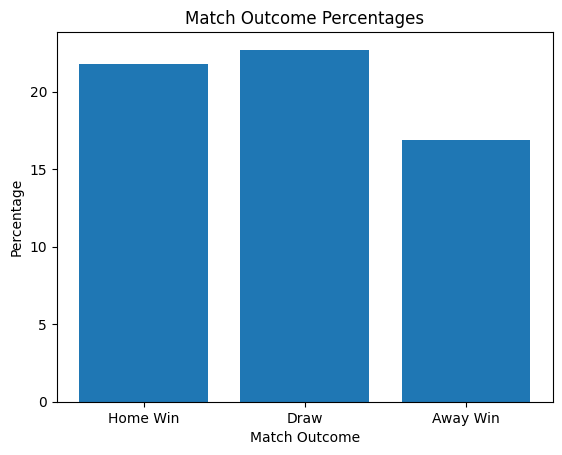

In [ ]:
# Data for plotting
categories = ['Home Win', 'Draw', 'Away Win']
percentages = [home_win_percentage, draw_percentage, away_win_percentage]

# Plotting the bar chart
plt.bar(categories, percentages)
plt.xlabel('Match Outcome')
plt.ylabel('Percentage')
plt.title('Match Outcome Percentages')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
numerical_df

,GF,GA,xG,xGA,Poss,Gls,Sh,SoT,SoT%,G/Sh,...,Lost,Blocks,Sh.1,Pass,Int,Tkl+Int,Clr,Err,Season,Attendance
0,2,0,2.6,0.5,62,2,18,5,27.8,0.11,...,3,14,2,12,5,14,17,1,2025,30014.0
1,2,0,2.5,0.5,62,2,19,8,42.1,0.11,...,6,14,3,11,7,24,12,0,2025,60017.0
2,3,0,1.8,1.4,47,3,11,3,27.3,0.27,...,8,13,0,13,10,34,28,0,2025,73738.0
3,0,1,0.9,0.4,68,0,14,5,35.7,0.00,...,6,5,0,5,11,23,16,0,2025,60344.0
4,3,0,2.0,1.1,58,3,19,12,63.2,0.16,...,11,10,4,6,6,26,24,1,2025,60347.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,0,4,0.5,2.2,34,0,8,1,12.5,0.00,...,15,8,4,4,8,21,14,0,2021,NaN
3176,0,2,0.7,2.0,50,0,7,0,0.0,0.00,...,17,13,6,7,9,31,19,2,2021,NaN
3177,1,0,1.2,1.4,38,1,10,3,30.0,0.10,...,7,13,5,8,8,22,27,0,2021,NaN
3178,0,1,0.9,1.6,49,0,11,1,9.1,0.00,...,24,12,2,10,4,21,16,0,2021,10000.0


In [ ]:
correlation_matrix = numerical_df.corr()

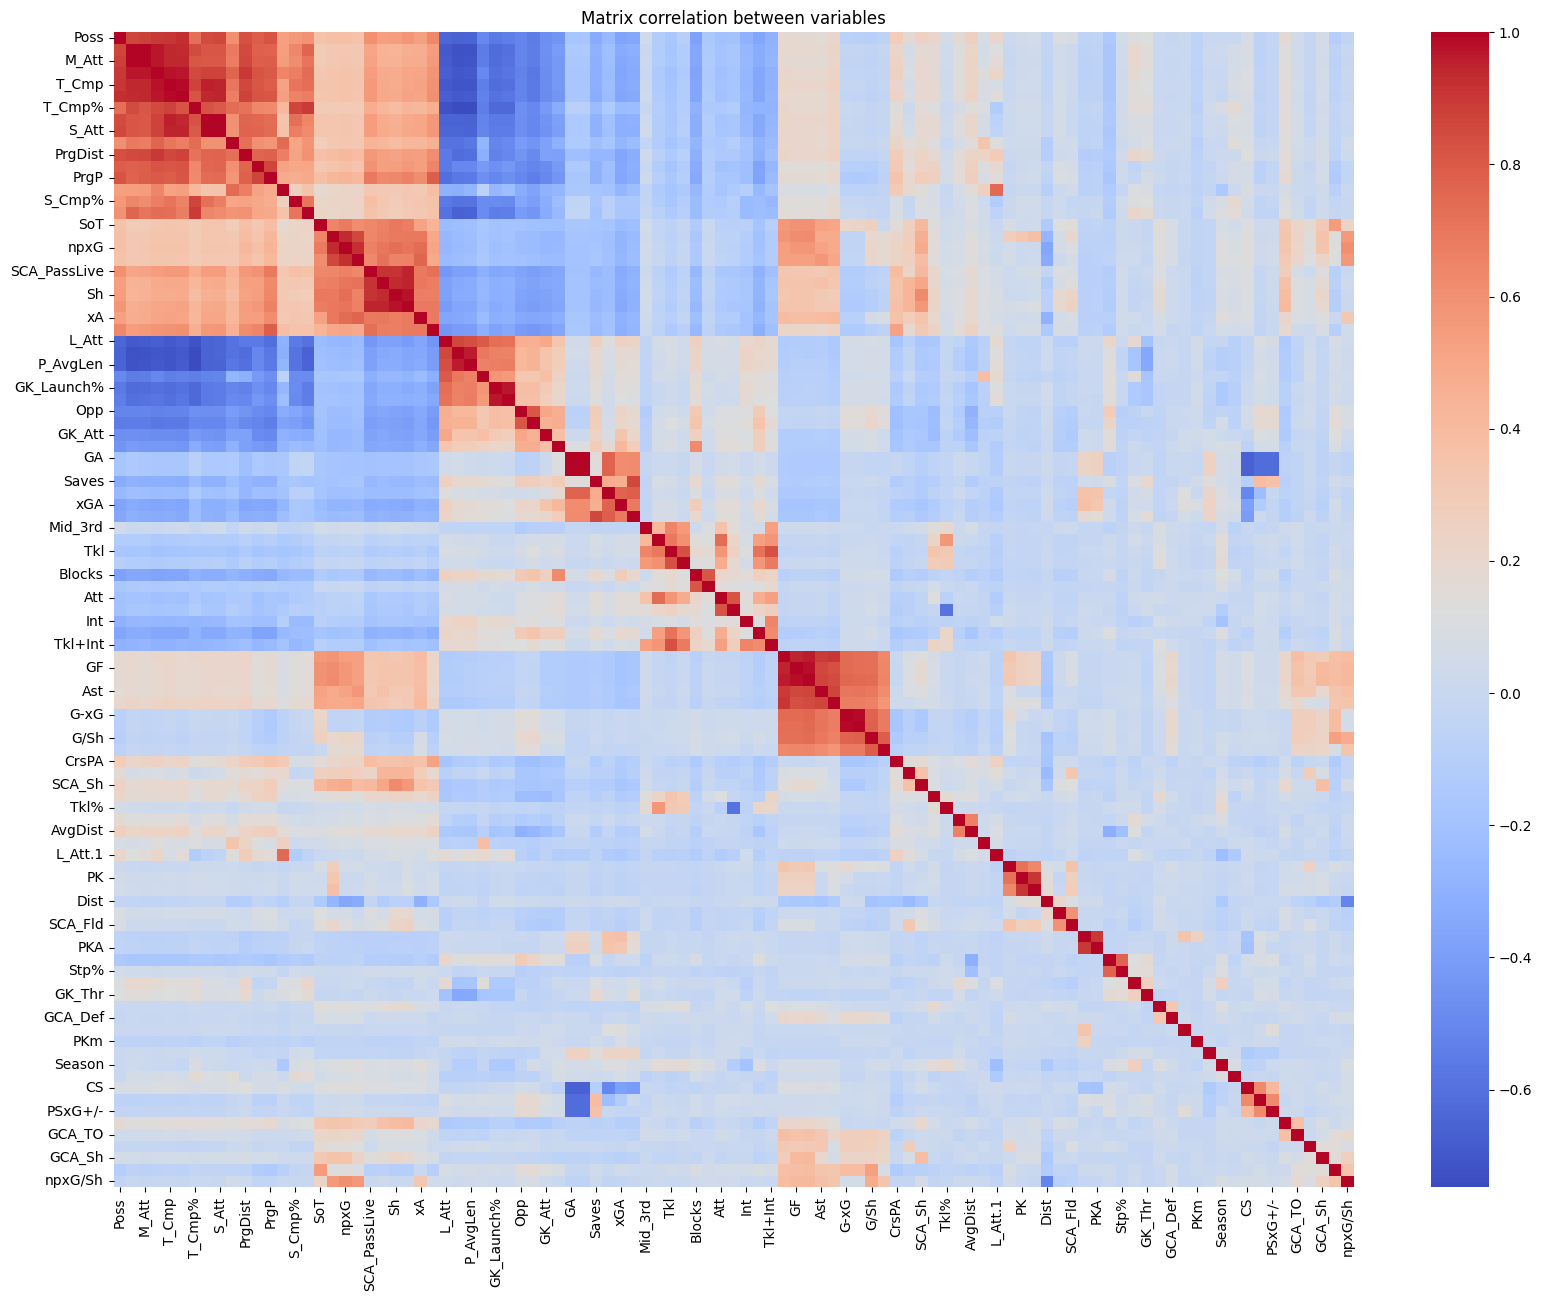

In [ ]:
# Perform hierarchical clustering
Z = linkage(correlation_matrix, 'ward')
dendro = dendrogram(Z, labels=correlation_matrix.columns, no_plot=True)
ordered_columns = dendro['ivl']

# Reorder the correlation matrix
correlation_matrix = correlation_matrix.loc[ordered_columns, ordered_columns]

# Plot the correlation matrix with clustering and rotated labels
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Matrix correlation between variables')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Identify variables most related to each other
high_correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs < 1]  # Exclude self-correlation

# Identify variables that could more clearly predict the goal attribute (e.g., Goals)
goal_correlations = correlation_matrix['GF'].sort_values(ascending=False)

# Identify variables that could be excluded (low correlation with Goals)
low_correlation_threshold = 0.1
low_correlation_vars = goal_correlations[goal_correlations.abs() < low_correlation_threshold]

In [ ]:
high_correlation_pairs.head(10)

,,0
S_Cmp,S_Att,0.996048
S_Att,S_Cmp,0.996048
M_Cmp,M_Att,0.994233
M_Att,M_Cmp,0.994233
T_Cmp,T_Att,0.991740
T_Att,T_Cmp,0.991740
np:G-xG,G-xG,0.988665
G-xG,np:G-xG,0.988665
Gls,GF,0.984361
GF,Gls,0.984361


In [ ]:
goal_correlations.head(10)

,GF
GF,1.000000
Gls,0.984361
GCA,0.949656
Ast,0.857258
GCA_PassLive,0.834679
G-xG,0.742730
np:G-xG,0.730213
G/Sh,0.722520
G/SoT,0.638519
xG,0.615911


In [ ]:
low_correlation_vars.head()

,GF
SCA_PassDead,0.099640
L_Cmp.1,0.092105
SCA_Fld,0.088021
Att_3rd,0.083180
Season,0.066285


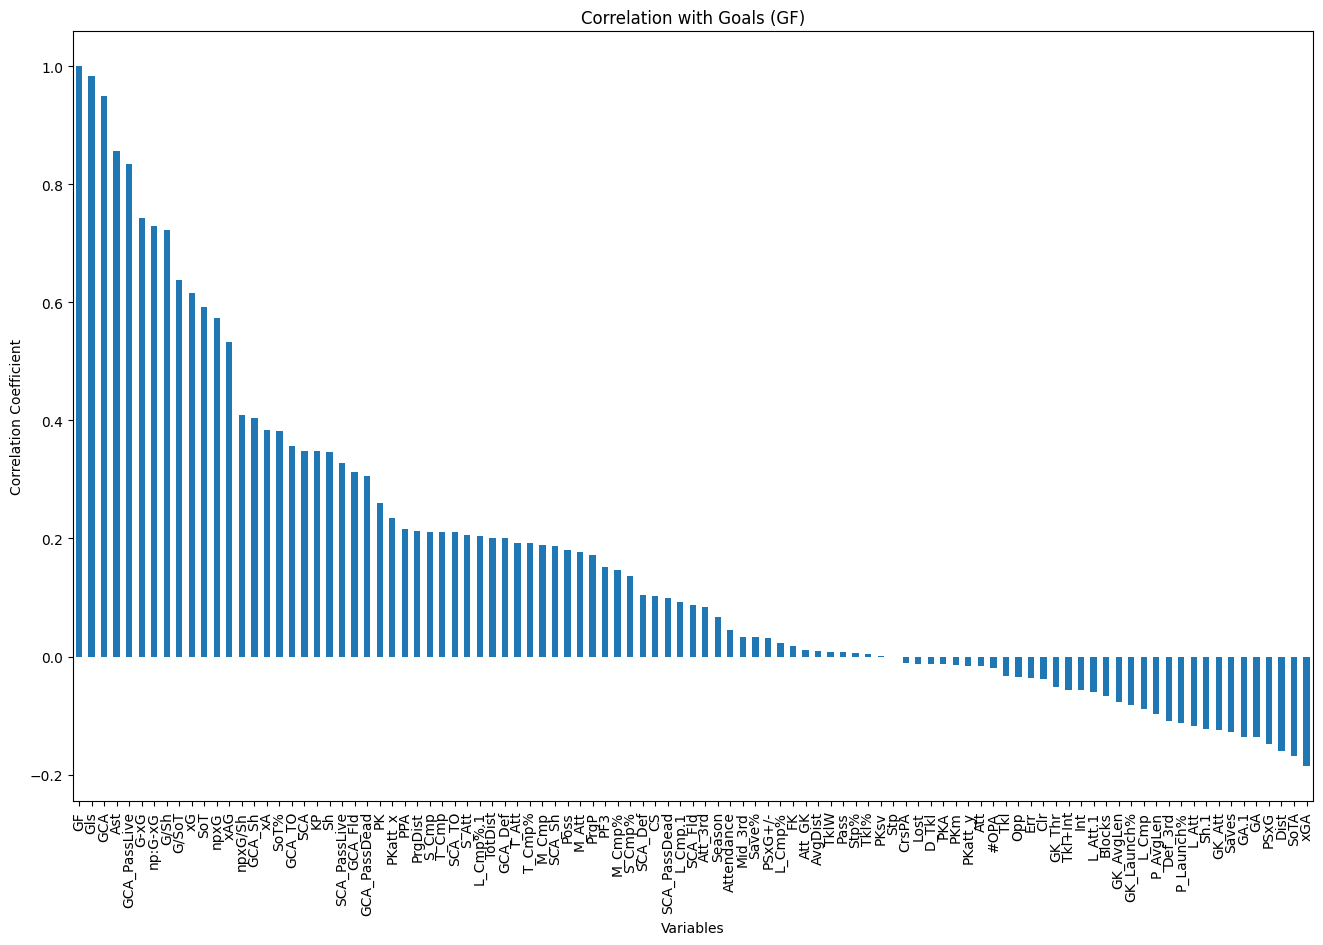

In [ ]:
# Plot goal correlations
plt.figure(figsize=(16, 10))
goal_corr_plot = goal_correlations.plot(kind='bar')
plt.title('Correlation with Goals (GF)')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

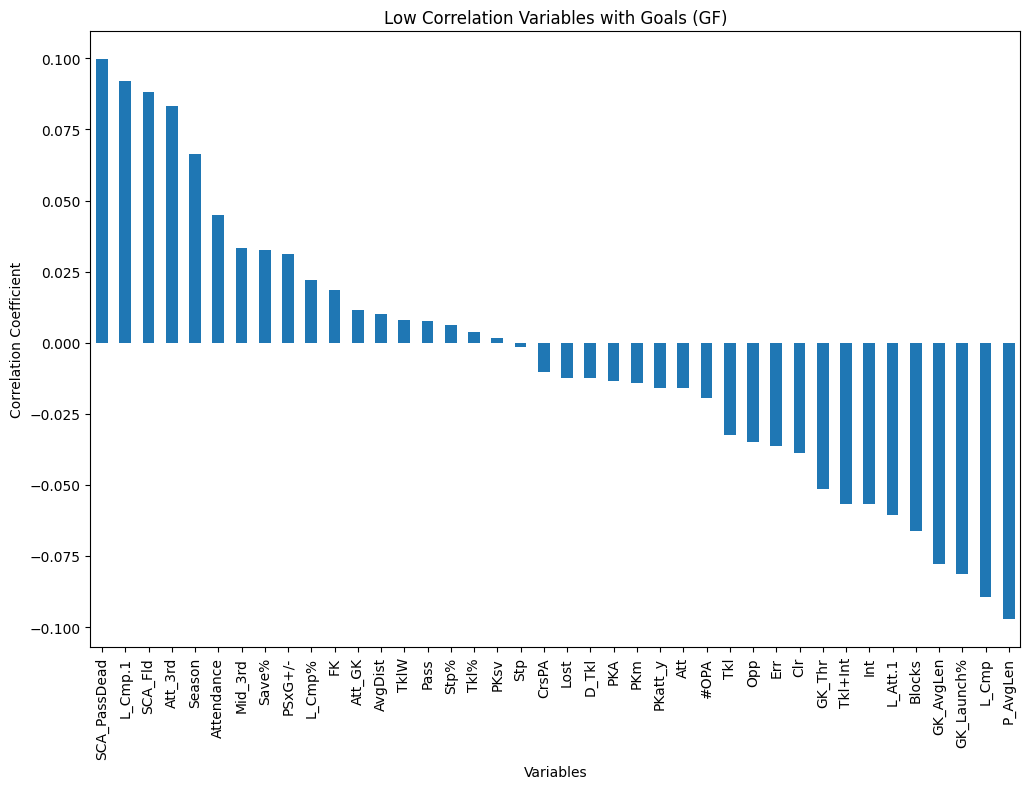

In [ ]:
# Plot low correlation variables
plt.figure(figsize=(12, 8))
low_corr_plot = low_correlation_vars.plot(kind='bar')
plt.title('Low Correlation Variables with Goals (GF)')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Encode the Result attribute
df['Result_Encoded'] = df['Result'].map({'W': 3, 'D': 1, 'L': 0})
numerical_df = df.select_dtypes(include=['float64', 'int64'])

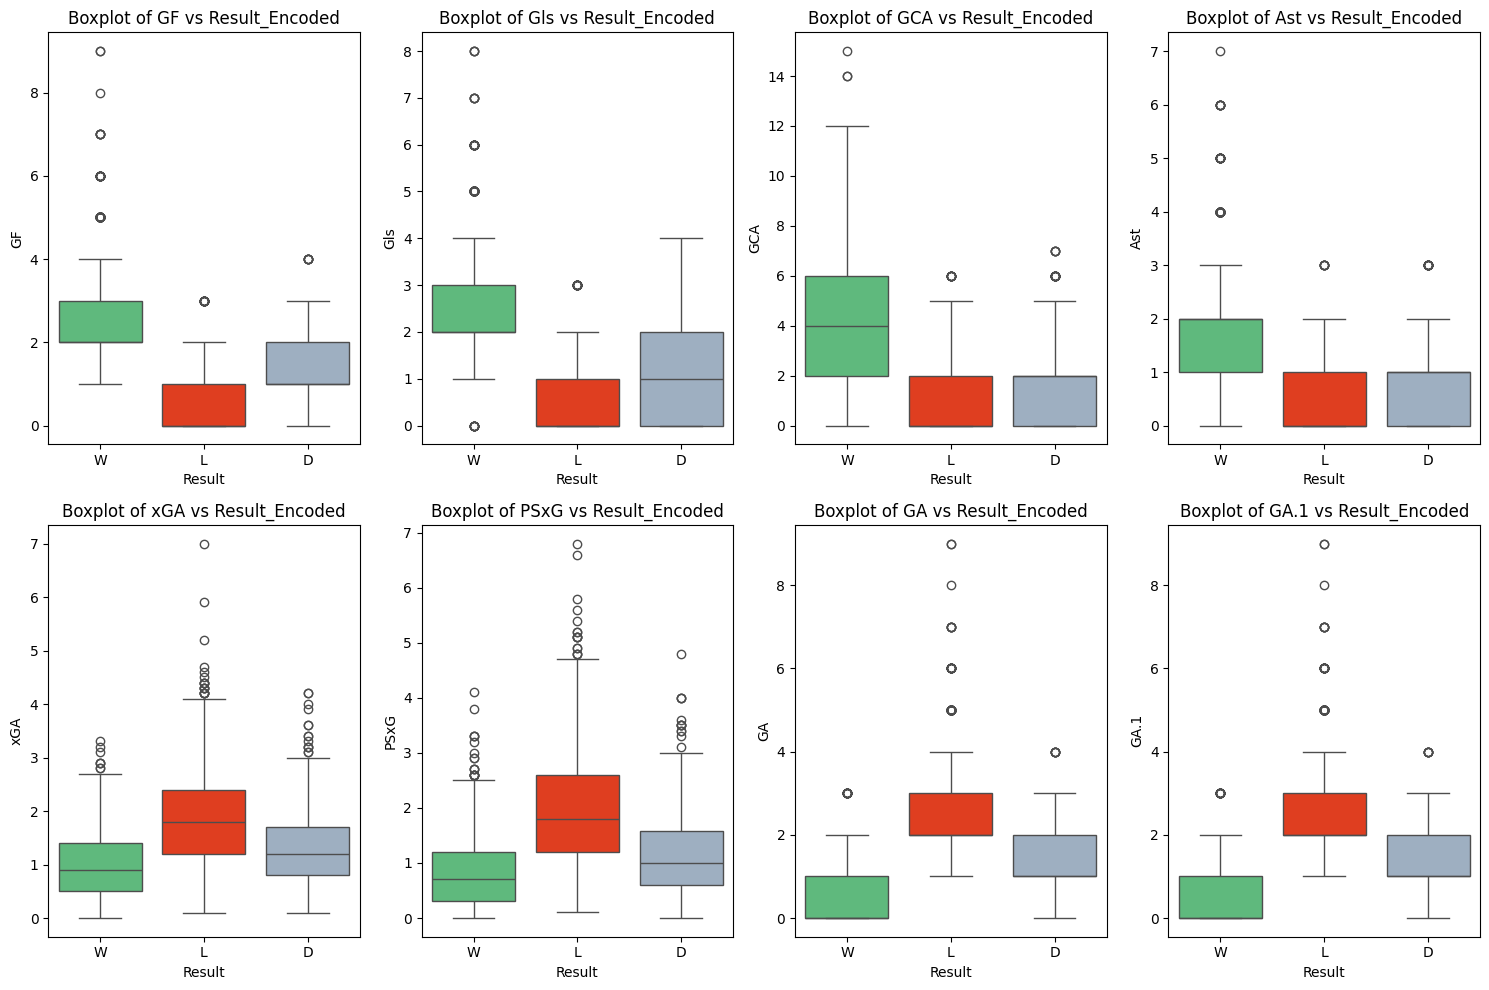

In [ ]:
# Add the encoded Result column
numerical_df['Result_Encoded'] = df['Result_Encoded']

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Identify variables that could more clearly predict the result attribute
result_correlations = correlation_matrix['Result_Encoded'].sort_values(ascending=False)

# Remove 'Result_Encoded' from the list of best and worst related variables
best_related_vars = result_correlations.drop('Result_Encoded').head(4).index.tolist()
worst_related_vars = result_correlations.drop('Result_Encoded').tail(4).index.tolist()

# Plot boxplots for best and worst related variables with result attribute
plt.figure(figsize=(15, 10))
palette = {'W': "#50C878", 'D': "#98AFC7", 'L': "#FF2800"}

# Best related variables
for i, var in enumerate(best_related_vars):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df['Result'], y=df[var], hue=df['Result'], palette=palette, dodge=False, legend=False)
    plt.title(f'Boxplot of {var} vs Result_Encoded')

# Worst related variables
for i, var in enumerate(worst_related_vars):
    plt.subplot(2, 4, i + 5)
    sns.boxplot(x=df['Result'], y=df[var], hue=df['Result'], palette=palette, dodge=False, legend=False)
    plt.title(f'Boxplot of {var} vs Result_Encoded')

plt.tight_layout()
plt.show()


In [ ]:
best_related_vars

['Result_Encoded', 'GF', 'Gls', 'GCA']